[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pinecone-io/examples/blob/master/learn/search/image/image-retrieval-ebook/cnn/xx_convolution.ipynb) [![Open nbviewer](https://raw.githubusercontent.com/pinecone-io/examples/master/assets/nbviewer-shield.svg)](https://nbviewer.org/github/pinecone-io/examples/blob/master/learn/search/image/image-retrieval-ebook/cnn/xx_convolution.ipynb)

Based on [SO answer](https://stackoverflow.com/questions/25439243/find-the-area-between-two-curves-plotted-in-matplotlib-fill-between-area)

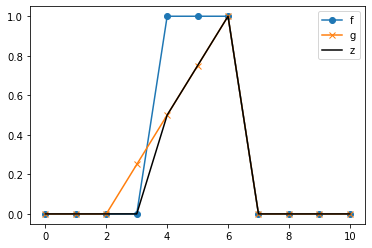

In [55]:
import matplotlib.pyplot as plt
import numpy as np

f = np.asarray([0, 0, 0,   0,  1,   1, 1, 0, 0, 0, 0])
g = np.asarray([0, 0, 0, .25, .5, .75, 1, 0, 0, 0, 0])
# get the convolution curve
z = np.asarray([min(x, y) for x, y in zip(f, g)])

x = np.asarray(list(range(len(f))))

plt.plot(x, f, label='f', marker='o')
plt.plot(x, g, label='g', marker='x')
plt.plot(x, z, label='z', color='k')
plt.legend()
plt.show()

Calculate x intersect

In [56]:
dx = x[1:] - x[:-1]

x_intersect = x[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]

/var/folders/g7/qd2j76kn64ggrl4ym2vlvzwr0000gn/T/ipykernel_34103/2039539148.py:3: RuntimeWarning: divide by zero encountered in true_divide
  x_intersect = x[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
/var/folders/g7/qd2j76kn64ggrl4ym2vlvzwr0000gn/T/ipykernel_34103/2039539148.py:3: RuntimeWarning: invalid value encountered in multiply
  x_intersect = x[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
/var/folders/g7/qd2j76kn64ggrl4ym2vlvzwr0000gn/T/ipykernel_34103/2039539148.py:4: RuntimeWarning: divide by zero encountered in true_divide
  dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]
/var/folders/g7/qd2j76kn64ggrl4ym2vlvzwr0000gn/T/ipykernel_34103/2039539148.py:4: RuntimeWarning: invalid value encountered in multiply
  dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]


Where curves don't intersect, area calculation is simple:

In [57]:
areas = abs(z[:-1] + z[1:]) * 0.5 * dx # signs of both z are same
total_area = np.sum(areas)

*(you can confirm by drawing out squares and triangles from the above and calculating the areas, it makes sense I promise)*

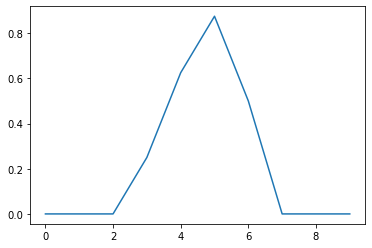

In [58]:
plt.plot(range(len(areas)), areas)

In [59]:
total_area

2.25

We need to repeat this with a sliding $g$ filter.

In [60]:
padding = int(len(g) / 2)
pad_g = np.append(np.zeros(padding), g)
pad_g = np.append(pad_g, np.zeros(padding))
pad_g.shape

(21,)

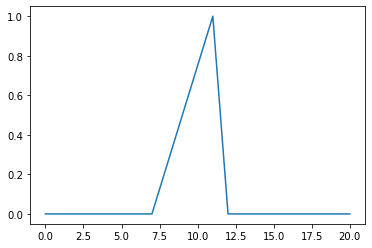

In [61]:
plt.plot(range(len(pad_g)), pad_g)

In [62]:
def calc_area(f, g):
    # get the convolution curve
    z = np.asarray([min(x, y) for x, y in zip(f, g)])
    # calculate intersect
    x_intersect = x[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
    dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]
    # area calculation
    areas = abs(z[:-1] + z[1:]) * 0.5 * dx
    # calculate total area
    total_area = np.sum(areas)
    return total_area

In [63]:
areas = []
size = len(f)
for i in range(size):
    areas.append(calc_area(f, pad_g[i:i+size]))

/var/folders/g7/qd2j76kn64ggrl4ym2vlvzwr0000gn/T/ipykernel_34103/879211470.py:5: RuntimeWarning: divide by zero encountered in true_divide
  x_intersect = x[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
/var/folders/g7/qd2j76kn64ggrl4ym2vlvzwr0000gn/T/ipykernel_34103/879211470.py:5: RuntimeWarning: invalid value encountered in multiply
  x_intersect = x[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
/var/folders/g7/qd2j76kn64ggrl4ym2vlvzwr0000gn/T/ipykernel_34103/879211470.py:6: RuntimeWarning: divide by zero encountered in true_divide
  dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]
/var/folders/g7/qd2j76kn64ggrl4ym2vlvzwr0000gn/T/ipykernel_34103/879211470.py:6: RuntimeWarning: invalid value encountered in multiply
  dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]


In [64]:
areas

[0.0, 0.0, 0.25, 0.75, 1.5, 2.25, 1.75, 1.0, 0.0, 0.0, 0.0]

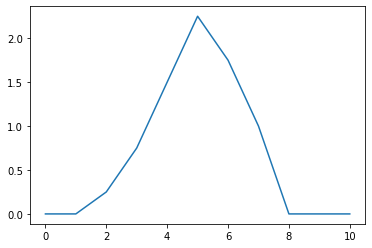

In [65]:
plt.plot(x, areas)
plt.show()